In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [ ]:
df=pd.read_csv('AIBundy.csv')

In [4]:
df.columns=['invoiceno', 'date', 'country', 'productID', 'shop', 'gender',
       'size_US', 'size_EU', 'size_UK', 'unitprice', 'discount',
       'year', 'month', 'saleprice']

In [5]:
df.head()

,invoiceno,date,country,productID,shop,gender,size_US,size_EU,size_UK,unitprice,discount,year,month,saleprice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   invoiceno  14967 non-null  int64  
 1   date       14967 non-null  object 
 2   country    14967 non-null  object 
 3   productID  14967 non-null  int64  
 4   shop       14967 non-null  object 
 5   gender     14967 non-null  object 
 6   size_US    14967 non-null  float64
 7   size_EU    14967 non-null  object 
 8   size_UK    14967 non-null  float64
 9   unitprice  14967 non-null  int64  
 10  discount   14967 non-null  float64
 11  year       14967 non-null  int64  
 12  month      14967 non-null  int64  
 13  saleprice  14967 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.6+ MB


In [ ]:
###Convert the date field to datetime in 2014-01-01 format
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y").dt.strftime("%Y-%m-%d")

In [15]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   invoiceno  14967 non-null  int64         
 1   date       14967 non-null  datetime64[ns]
 2   country    14967 non-null  object        
 3   productID  14967 non-null  int64         
 4   shop       14967 non-null  object        
 5   gender     14967 non-null  object        
 6   size_US    14967 non-null  float64       
 7   size_EU    14967 non-null  object        
 8   size_UK    14967 non-null  float64       
 9   unitprice  14967 non-null  int64         
 10  discount   14967 non-null  float64       
 11  year       14967 non-null  int64         
 12  month      14967 non-null  int64         
 13  saleprice  14967 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 1.6+ MB


In [16]:
df.head()

,invoiceno,date,country,productID,shop,gender,size_US,size_EU,size_UK,unitprice,discount,year,month,saleprice
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


In [18]:
###Dropping size UK and EU columns since three size columns not needed
cols=['size_EU','size_UK']
df.drop(cols,axis=1,inplace=True)
df.head()

,invoiceno,date,country,productID,shop,gender,size_US,unitprice,discount,year,month,saleprice
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,159,0.0,2014,1,159.0
1,52390,2014-01-01,United States,2230,US15,Male,11.5,199,0.2,2014,1,159.2
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,149,0.2,2014,1,119.2
3,52392,2014-01-01,United States,2234,US6,Female,9.5,159,0.0,2014,1,159.0
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,159,0.0,2014,1,159.0


In [26]:
###CONVERTING THE DATA TYPE OF CATEGORICAL VARIABLES
df['year']=df['year'].astype('category')
df['month']=df['month'].astype('category')
df['gender']=df['gender'].astype('category')
df['country']=df['country'].astype('category')

In [28]:
###REMOVING discount field as we already have unit price and sale price. discount can be calculated if needed
df.drop(['discount'],axis=1,inplace=True)

In [29]:
df.dtypes

invoiceno             int64
date         datetime64[ns]
country            category
productID             int64
shop                 object
gender             category
size_US             float64
unitprice             int64
year               category
month              category
saleprice           float64
dtype: object

In [30]:
###Check for null
df.isnull().sum()

invoiceno    0
date         0
country      0
productID    0
shop         0
gender       0
size_US      0
unitprice    0
year         0
month        0
saleprice    0
dtype: int64

In [31]:
df.head()

,invoiceno,date,country,productID,shop,gender,size_US,unitprice,year,month,saleprice
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,159,2014,1,159.0
1,52390,2014-01-01,United States,2230,US15,Male,11.5,199,2014,1,159.2
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,149,2014,1,119.2
3,52392,2014-01-01,United States,2234,US6,Female,9.5,159,2014,1,159.0
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,159,2014,1,159.0


In [45]:
###FIND latitude and longitude of the countries
!pip install geopy

In [46]:
import pandas as pd
from geopy.geocoders import Nominatim

In [80]:
df['latitude'] = 0.0
df['longitude']= 0.0

In [81]:
# Function to get latitude and longitude
def get_coordinates(country_name,i):
    geolocator = Nominatim(user_agent="geoapi")
    location = geolocator.geocode(country_name)
    if location:
        df['latitude'][i] = location.latitude
        df['longitude'][i]= location.longitude
    else:
        df['latitude'][i] = None
        df['longitude'][i]= None

In [ ]:
# Apply the function to create new columns
for i in range(1,100):
  get_coordinates(df.loc[i,'country'],i)

In [89]:
df.iloc[1990:2000,:]

,invoiceno,date,country,productID,shop,gender,size_US,unitprice,year,month,saleprice,latitude,longitude
1990,54086,2014-09-22,United States,2218,US10,Female,11.5,139,2014,9,125.1,39.783730,-100.445882
1991,54087,2014-09-22,Canada,2200,CAN6,Male,11.0,129,2014,9,129.0,61.066692,-107.991707
1992,54087,2014-09-22,Canada,2219,CAN5,Male,9.5,149,2014,9,149.0,61.066692,-107.991707
1993,54088,2014-09-22,Germany,2172,GER1,Female,10.0,199,2014,9,199.0,51.163818,10.447831
1994,54089,2014-09-22,Germany,2186,GER2,Female,9.0,149,2014,9,119.2,51.163818,10.447831
1995,54090,2014-09-22,United States,2219,US12,Male,10.5,169,2014,9,152.1,39.783730,-100.445882
1996,54091,2014-09-22,United States,2188,US15,Male,12.0,169,2014,9,169.0,39.783730,-100.445882
1997,54092,2014-09-23,Germany,2192,GER2,Male,15.0,199,2014,9,139.3,51.163818,10.447831
1998,54093,2014-09-23,Canada,2177,CAN5,Female,8.0,149,2014,9,149.0,61.066692,-107.991707
1999,54094,2014-09-23,Germany,2182,GER2,Male,10.5,149,2014,9,149.0,51.163818,10.447831


In [100]:
cond=(df['latitude']!=0)
df_country=df[cond].loc[:,['country','latitude','longitude']].drop_duplicates()
df_country

,country,latitude,longitude
1,United States,39.783730,-100.445882
2,Canada,61.066692,-107.991707
4,United Kingdom,54.702354,-3.276575
6,Germany,51.163818,10.447831


In [104]:
df = pd.merge(df,df_country,left_on='country',right_on='country',how='left')

In [ ]:
df.drop(['latitude_x','longitude_x'],axis=1,inplace=True)

In [110]:
df.rename(columns={'latitude_y':'latitude','longitude_y':'longitude'},inplace=True)
df.head()

,invoiceno,date,country,productID,shop,gender,size_US,unitprice,year,month,saleprice,latitude,longitude
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,159,2014,1,159.0,54.702354,-3.276575
1,52390,2014-01-01,United States,2230,US15,Male,11.5,199,2014,1,159.2,39.783730,-100.445882
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,149,2014,1,119.2,61.066692,-107.991707
3,52392,2014-01-01,United States,2234,US6,Female,9.5,159,2014,1,159.0,39.783730,-100.445882
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,159,2014,1,159.0,54.702354,-3.276575


In [111]:
(df['latitude']==0.0).sum()

0

In [114]:
###CREATE A DIMENSION TABLE FOR THE PRODUCTS
df_product=df.loc[1:,['productID','gender','size_US','unitprice']]

In [115]:
df_product.drop_duplicates(inplace=True)

In [116]:
df_product.head()

,productID,gender,size_US,unitprice
1,2230,Male,11.5,199
2,2160,Male,9.5,149
3,2234,Female,9.5,159
4,2222,Female,9.0,159
5,2173,Male,10.5,159


In [118]:
###CREATE A FACT TABLE FOR THE TRANSACTIONS
df_tran=df.loc[1:,['invoiceno','date','country','shop','productID','saleprice','latitude','longitude']]
df_tran.head()

,invoiceno,date,country,shop,productID,saleprice,latitude,longitude
1,52390,2014-01-01,United States,US15,2230,159.2,39.783730,-100.445882
2,52391,2014-01-01,Canada,CAN7,2160,119.2,61.066692,-107.991707
3,52392,2014-01-01,United States,US6,2234,159.0,39.783730,-100.445882
4,52393,2014-01-01,United Kingdom,UK4,2222,159.0,54.702354,-3.276575
5,52394,2014-01-01,United States,US15,2173,159.0,39.783730,-100.445882


In [44]:
###FIND FOR EACH SHOE SIZE, HOW MANY UNITS SOLD ACROSS COUNTRIES
ag={'productID':'nunique','saleprice':'sum'}
df1=df.groupby(['gender','size_US','country']).agg(ag)

productID  saleprice
gender size_US country                             
Female 4.5     Canada                  2      894.0
               Germany                 3     1323.3
               United Kingdom          5     2135.1
               United States           7     3125.4
       5.0     Canada                  2      954.0
...                                  ...        ...
Male   14.0    United States          17     9248.7
       15.0    Canada                  8     3790.8
               Germany                16     6966.9
               United Kingdom          4     1650.9
               United States           7     3670.2

[152 rows x 2 columns]

from matplotlib import pyplot as plt
_df_0['productID'].plot(kind='hist', bins=20, title='productID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['saleprice'].plot(kind='hist', bins=20, title='saleprice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='productID', y='saleprice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['productID'].plot(kind='line', figsize=(8, 4), title='productID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['saleprice'].plot(kind='line', figsize=(8, 4), title='saleprice')
plt.gca().spines[['top', 'right']].set_visible(False)

In [120]:
###USING SEABORN TO PLOT SOME CHARTS
import seaborn as sns

In [121]:
df.head()

,invoiceno,date,country,productID,shop,gender,size_US,unitprice,year,month,saleprice,latitude,longitude
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,159,2014,1,159.0,54.702354,-3.276575
1,52390,2014-01-01,United States,2230,US15,Male,11.5,199,2014,1,159.2,39.783730,-100.445882
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,149,2014,1,119.2,61.066692,-107.991707
3,52392,2014-01-01,United States,2234,US6,Female,9.5,159,2014,1,159.0,39.783730,-100.445882
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,159,2014,1,159.0,54.702354,-3.276575


In [124]:
###ACROSS the years and quarters, plot the total sales for each country
df_x=df.loc[:,['date','country','saleprice']].copy()
df_x['year']=df_x['date'].dt.year
df_x['quarter']=df_x['date'].dt.quarter
df_x['month']=df_x['date'].dt.month
df_x.head()

,date,country,saleprice,year,quarter,month
0,2014-01-01,United Kingdom,159.0,2014,1,1
1,2014-01-01,United States,159.2,2014,1,1
2,2014-01-01,Canada,119.2,2014,1,1
3,2014-01-01,United States,159.0,2014,1,1
4,2014-01-01,United Kingdom,159.0,2014,1,1


In [138]:
yearly_sales = df_x.groupby(['country','year','quarter'])['saleprice'].sum().reset_index()
yearly_sales['year']=yearly_sales['year'].astype('category')
yearly_sales['quarter']=yearly_sales['quarter'].astype('category')
yearly_sales.head()

,country,year,quarter,saleprice
0,Canada,2014,1,18735.2
1,Canada,2014,2,24826.6
2,Canada,2014,3,22851.8
3,Canada,2014,4,21273.0
4,Canada,2015,1,25394.5


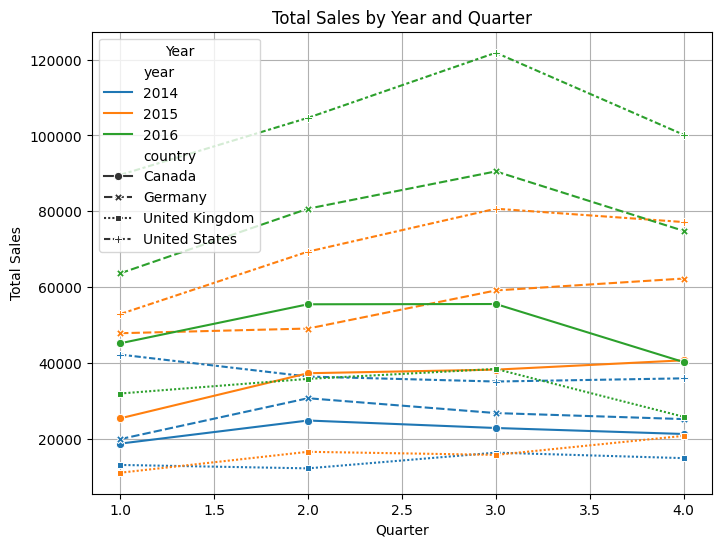

In [140]:
# Plot line chart
plt.figure(figsize=(8, 6))
sns.lineplot(data=yearly_sales, x='quarter', y='saleprice', hue='year', style='country', markers=True)
# Add title and labels
plt.title('Total Sales by Year and Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid(True)

# Show the plot
plt.show()

In [155]:
### EXTRACT MALE, US, 2016 data
cond=(df['country']=='United States') & (df['gender']=='Male') & (df['year']==2016)
male_us=df[cond].loc[:,['size_US','shop','year','month','saleprice']]

In [156]:
male_us

,size_US,shop,year,month,saleprice
7617,9.5,US13,2016,1,125.3
7619,8.5,US6,2016,1,151.2
7629,8.0,US3,2016,1,159.0
7631,8.0,US13,2016,1,129.0
7632,14.0,US14,2016,1,169.0
...,...,...,...,...,...
14950,9.5,US13,2016,12,199.0
14951,10.0,US14,2016,12,97.3
14956,9.5,US15,2016,12,139.0
14960,9.0,US15,2016,12,189.0


In [159]:
###CREATE A PIVOT TABLE with size(US) and month wise total sales
pivot_table=pd.pivot_table(male_us, values='saleprice', index=['size_US'], columns=['month'], fill_value=0, aggfunc=sum)
pivot_table

month,1,2,3,4,5,6,7,8,9,10,11,12
size_US,,,,,,,,,,,,
6.0,441.6,132.3,407.0,134.1,377.2,283.5,541.1,540.6,347.5,810.3,339.8,0.0
6.5,417.3,232.2,0.0,161.1,0.0,0.0,139.0,987.1,303.3,129.0,308.2,189.0
7.0,0.0,0.0,111.2,0.0,680.5,576.0,636.0,302.4,406.3,0.0,0.0,0.0
7.5,362.3,318.0,379.6,199.0,1085.5,0.0,1072.7,328.0,580.5,944.0,169.0,139.0
8.0,879.6,1408.5,1005.2,427.0,1687.7,298.0,1357.8,594.5,954.1,743.3,349.1,715.0
8.5,1885.0,1709.0,1219.7,1154.1,1994.9,1291.2,2427.2,2480.1,881.1,1482.0,1371.5,919.3
9.0,2489.5,2077.2,1615.6,1432.5,3325.7,3124.3,3519.2,4087.3,3844.6,3627.0,1786.2,1482.6
9.5,2875.8,2998.4,3819.9,3381.8,3781.7,4992.8,3674.6,6007.8,4629.4,6230.4,4973.1,3882.6
10.0,2323.4,3266.0,4063.2,2532.3,2337.1,4531.4,3704.6,3528.4,3419.9,4642.0,1934.2,3025.4


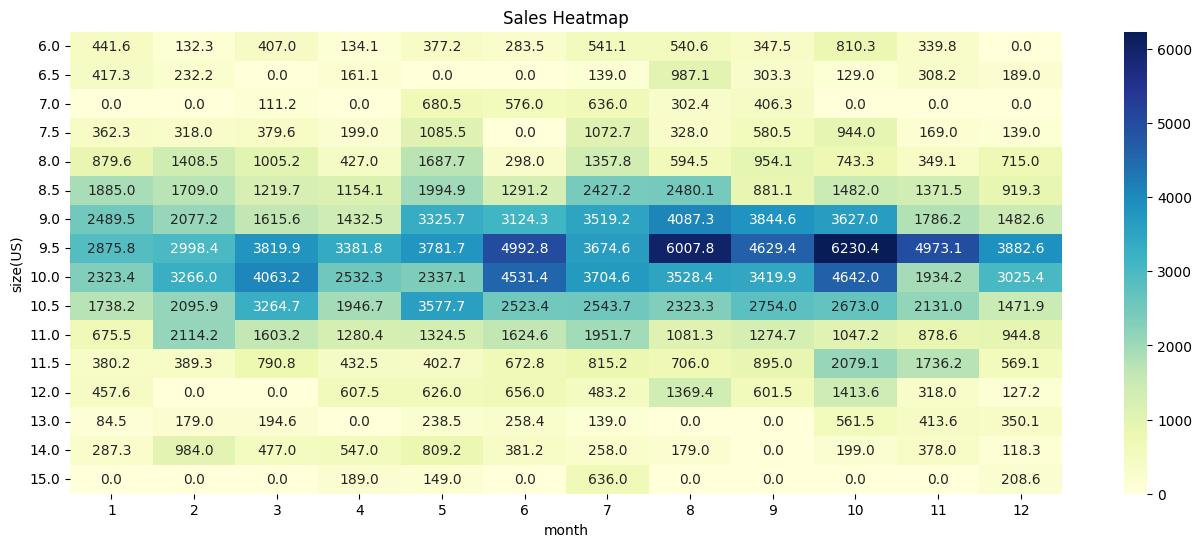

In [161]:
### CREATE A MONTH BASED HEATMAP TO REPRESENT THE ABOVE PIVOT TABLE
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlGnBu')

# Adding labels and title
plt.title('Sales Heatmap')
plt.xlabel('month')
plt.ylabel('size(US)')

# Show plot
plt.show()

In [ ]:
#from the above heatmap, we can see that, for men's shoes in the us in 2016:
#size 9.5 sales more than others over a 12 months period with August and October months scoring the highest closely followed by June
#size 10 scores next best with the same trends for the months as above.
#maximum sales are for size 9-10.5 which.

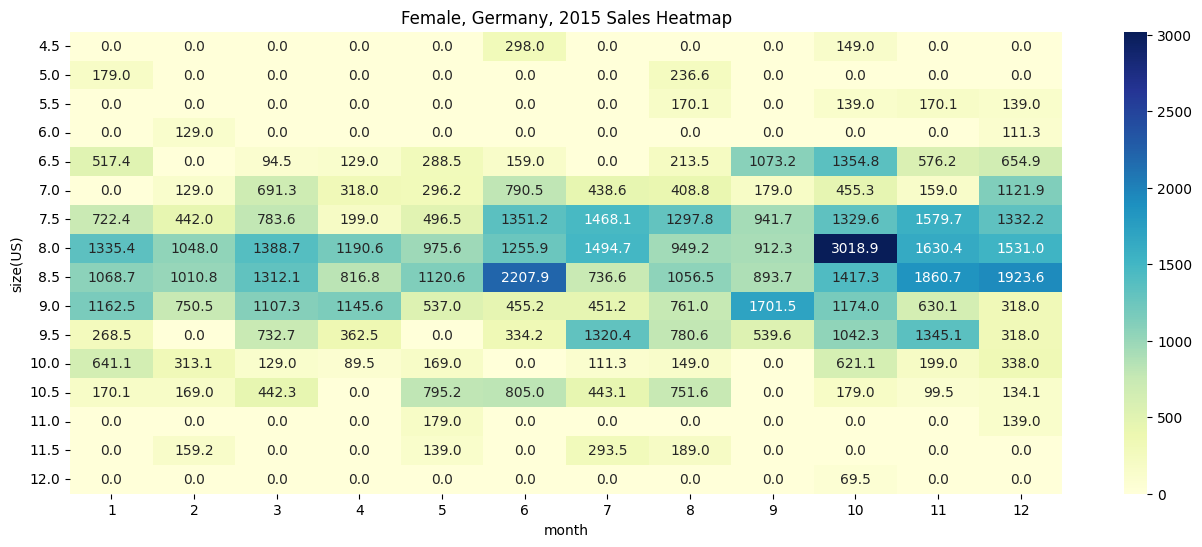

In [162]:
#create the same for females in Germany in 2015
cond=(df['country']=='Germany') & (df['gender']=='Female') & (df['year']==2015)
female_ger=df[cond].loc[:,['size_US','shop','year','month','saleprice']]
pivot_table=pd.pivot_table(female_ger, values='saleprice', index=['size_US'], columns=['month'], fill_value=0, aggfunc=sum)
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Female, Germany, 2015 Sales Heatmap')
plt.xlabel('month')
plt.ylabel('size(US)')

# Show plot
plt.show()


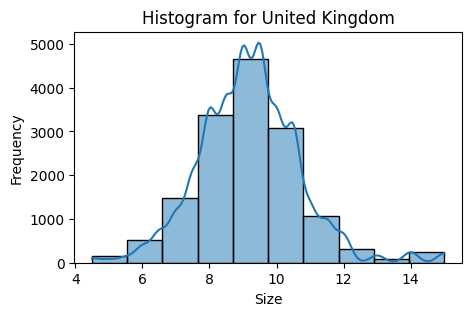

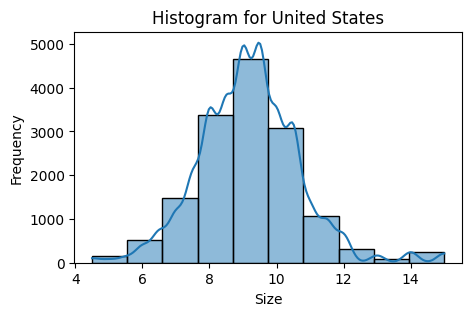

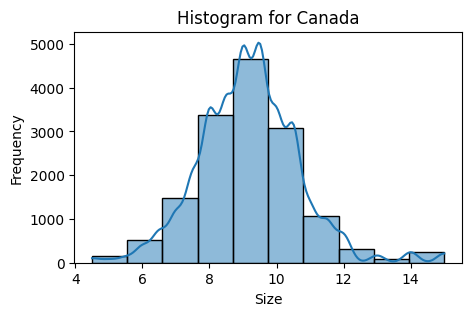

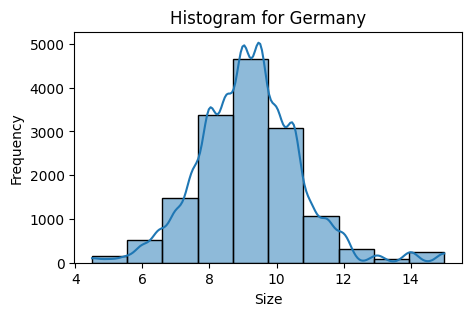

In [165]:
###for each country, histogram plot for each size
for country in df['country'].unique():
    # Filter DataFrame for the current country
    country_df = df[df['country'] == country]

    # Create histogram plot for the current country
    plt.figure(figsize=(5, 3))
    sns.histplot(data=country_df, x=df['size_US'], bins=10, kde=True)

    # Adding labels and title
    plt.title(f'Histogram for {country}')
    plt.xlabel('Size')
    plt.ylabel('Frequency')

    # Show plot
    plt.show()

In [173]:
###Find the statistics of each column of the table
x=df.groupby(['country','gender','size_US']).describe().drop(['invoiceno','date','latitude','longitude','productID'],axis=1)
x

unitprice                                   \
                                 count        mean    min    25%    50%   
country       gender size_US                                              
Canada        Female 4.5           6.0  149.000000  129.0  129.0  149.0   
                     5.0           6.0  159.000000  159.0  159.0  159.0   
                     5.5           6.0  149.000000  149.0  149.0  149.0   
                     6.0          21.0  163.285714  129.0  149.0  169.0   
                     6.5          51.0  166.058824  129.0  139.0  169.0   
...                                ...         ...    ...    ...    ...   
United States Male   11.5        156.0  163.230769  129.0  146.5  164.0   
                     12.0         87.0  165.896552  129.0  149.0  169.0   
                     13.0         39.0  164.384615  139.0  149.0  169.0   
                     14.0         60.0  161.500000  129.0  136.5  159.0   
                     15.0         24.0  160.250000  139.0  146.5  149.0   

                                                      saleprice              \
                                75%    max        std     count        mean   
country       gender size_US                                                  
Canada        Female 4.5      169.0  169.0  21.908902       6.0  149.000000   
                     5.0      159.0  159.0   0.000000       6.0  159.000000   
                     5.5      149.0  149.0   0.000000       6.0  126.650000   
                     6.0      179.0  189.0  18.860389      21.0  154.057143   
                     6.5      189.0  199.0  25.162998      51.0  142.388235   
...                             ...    ...        ...       ...         ...   
United States Male   11.5     181.5  199.0  23.473759     156.0  145.748077   
                     12.0     179.0  199.0  19.066002      87.0  149.106897   
                     13.0     179.0  189.0  18.041787      39.0  138.238462   
                     14.0     181.5  199.0  26.078434      60.0  154.145000   
                     15.0     181.5  189.0  20.707592      24.0  152.925000   

                                                                      \
                                min      25%     50%      75%    max   
country       gender size_US                                           
Canada        Female 4.5      129.0  129.000  149.00  169.000  169.0   
                     5.0      159.0  159.000  159.00  159.000  159.0   
                     5.5      104.3  104.300  126.65  149.000  149.0   
                     6.0      129.0  134.100  143.10  179.000  189.0   
                     6.5       64.5  119.200  143.20  170.100  199.0   
...                             ...      ...     ...      ...    ...   
United States Male   11.5      64.5  123.625  149.00  172.325  199.0   
                     12.0      64.5  139.300  152.10  169.000  189.0   
                     13.0      79.5   97.300  149.00  161.100  189.0   
                     14.0     103.2  129.000  149.00  179.000  199.0   
                     15.0     104.3  135.525  149.00  181.500  189.0   

                                         
                                    std  
country       gender size_US             
Canada        Female 4.5      21.908902  
                     5.0       0.000000  
                     5.5      24.483198  
                     6.0      23.135159  
                     6.5      42.347858  
...                                 ...  
United States Male   11.5     36.202989  
                     12.0     34.001268  
                     13.0     36.094668  
                     14.0     28.497609  
                     15.0     29.442771  

[128 rows x 16 columns]

In [176]:
x.reset_index(inplace=True)

In [178]:
x.columns

MultiIndex([(  'country',      ''),
            (   'gender',      ''),
            (  'size_US',      ''),
            ('unitprice', 'count'),
            ('unitprice',  'mean'),
            ('unitprice',   'min'),
            ('unitprice',   '25%'),
            ('unitprice',   '50%'),
            ('unitprice',   '75%'),
            ('unitprice',   'max'),
            ('unitprice',   'std'),
            ('saleprice', 'count'),
            ('saleprice',  'mean'),
            ('saleprice',   'min'),
            ('saleprice',   '25%'),
            ('saleprice',   '50%'),
            ('saleprice',   '75%'),
            ('saleprice',   'max'),
            ('saleprice',   'std')],
           )

In [184]:
y=[]

In [185]:
for i in range(len(x.columns)):
  y.append('_'.join(x.columns[i]).strip())


In [186]:
y

['country_',
 'gender_',
 'size_US_',
 'unitprice_count',
 'unitprice_mean',
 'unitprice_min',
 'unitprice_25%',
 'unitprice_50%',
 'unitprice_75%',
 'unitprice_max',
 'unitprice_std',
 'saleprice_count',
 'saleprice_mean',
 'saleprice_min',
 'saleprice_25%',
 'saleprice_50%',
 'saleprice_75%',
 'saleprice_max',
 'saleprice_std']

In [188]:
x.columns=y
x.head()

,country_,gender_,size_US_,unitprice_count,unitprice_mean,unitprice_min,unitprice_25%,unitprice_50%,unitprice_75%,unitprice_max,unitprice_std,saleprice_count,saleprice_mean,saleprice_min,saleprice_25%,saleprice_50%,saleprice_75%,saleprice_max,saleprice_std
0,Canada,Female,4.5,6.0,149.000000,129.0,129.0,149.0,169.0,169.0,21.908902,6.0,149.000000,129.0,129.0,149.00,169.0,169.0,21.908902
1,Canada,Female,5.0,6.0,159.000000,159.0,159.0,159.0,159.0,159.0,0.000000,6.0,159.000000,159.0,159.0,159.00,159.0,159.0,0.000000
2,Canada,Female,5.5,6.0,149.000000,149.0,149.0,149.0,149.0,149.0,0.000000,6.0,126.650000,104.3,104.3,126.65,149.0,149.0,24.483198
3,Canada,Female,6.0,21.0,163.285714,129.0,149.0,169.0,179.0,189.0,18.860389,21.0,154.057143,129.0,134.1,143.10,179.0,189.0,23.135159
4,Canada,Female,6.5,51.0,166.058824,129.0,139.0,169.0,189.0,199.0,25.162998,51.0,142.388235,64.5,119.2,143.20,170.1,199.0,42.347858


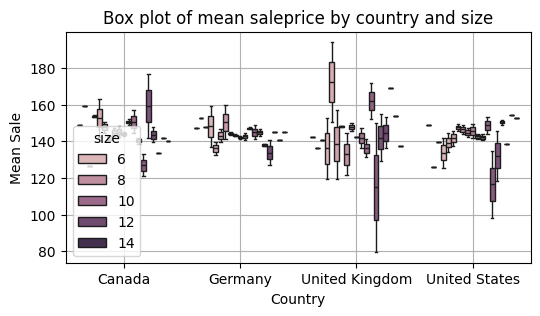

In [192]:
# Create a box plot
plt.figure(figsize=(6, 3))
sns.boxplot(data=x, x=x['country_'], y=x['saleprice_mean'], hue=x['size_US_'])

# Adding labels and title
plt.title('Box plot of mean saleprice by country and size')
plt.xlabel('Country')
plt.ylabel('Mean Sale')
plt.legend(title='size')
plt.grid(True)

In [193]:
###STOCK LEVEL ANALYSIS
#For male,US,2016
cond=(df['country']=='United States') & (df['gender']=='Male') & (df['year']==2016)
male_us=df[cond].loc[:,['size_US','shop','year','month','saleprice']]
#get a pivot table with the number of units sold during a 12 month period for each show size
pivot_table=pd.pivot_table(male_us, values='saleprice', index=['size_US'], columns=['month'], fill_value=0, aggfunc=len, margins=True, margins_name='Total')
pivot_table

month,1,2,3,4,5,6,7,8,9,10,11,12,Total
size_US,,,,,,,,,,,,,
6.0,4,1,3,1,3,3,3,4,3,7,3,0,35
6.5,3,2,0,1,0,0,1,7,2,1,2,1,20
7.0,0,0,1,0,6,4,4,2,3,0,0,0,20
7.5,3,2,3,1,7,0,7,3,4,6,1,1,38
8.0,7,9,7,3,12,2,9,4,7,5,2,6,73
8.5,12,12,8,8,15,9,17,17,6,9,10,6,129
9.0,17,13,13,11,21,22,25,30,26,25,13,10,226
9.5,19,25,27,24,26,33,25,47,31,44,37,26,364
10.0,17,26,26,19,16,31,25,24,23,31,15,20,273


In [ ]:
pivot_table.reset_index(inplace=True)

In [ ]:
pivot_table.drop(['index'],axis=1,inplace=True)

In [203]:
df_stat=pivot_table.iloc[:,:-1]
df_stat.head()

month,size_US,1,2,3,4,5,6,7,8,9,10,11,12
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6


In [204]:
#perform a t-test
import scipy as sc

In [205]:
#find t-value for a 95% confidence interval
t_value = sc.stats.t.ppf((1 + 0.95) / 2, 12-1)
t_value

2.200985160082949

In [211]:
len(df_stat)

17

In [212]:
temp=df_stat.drop(['size_US'],axis=1)
temp.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
0,4,1,3,1,3,3,3,4,3,7,3,0
1,3,2,0,1,0,0,1,7,2,1,2,1
2,0,0,1,0,6,4,4,2,3,0,0,0
3,3,2,3,1,7,0,7,3,4,6,1,1
4,7,9,7,3,12,2,9,4,7,5,2,6


In [218]:
temp['mean']=temp.mean(axis=1)
temp['std']=temp.std(axis=1)
temp['n']=temp.shape[1]-3
temp['se']=temp['std']/np.sqrt(temp['n'])
temp['margin_of_error']=t_value*temp['se']
temp['ci_lower'] = temp['mean'] - temp['margin_of_error']
temp['ci_upper'] = temp['mean'] + temp['margin_of_error']
temp.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,mean,std,n,se,margin_of_error,ci_lower,ci_upper
0,4,1,3,1,3,3,3,4,3,7,3,0,3.579481,2.820718,12,0.814271,1.792199,1.787282,5.371680
1,3,2,0,1,0,0,1,7,2,1,2,1,2.532683,3.162507,12,0.912937,2.009361,0.523322,4.542044
2,0,0,1,0,6,4,4,2,3,0,0,0,2.538743,3.253268,12,0.939138,2.067028,0.471715,4.605771
3,3,2,3,1,7,0,7,3,4,6,1,1,3.813132,3.116348,12,0.899612,1.980033,1.833099,5.793165
4,7,9,7,3,12,2,9,4,7,5,2,6,6.315439,3.215417,12,0.928211,2.042979,4.272461,8.358418


In [219]:
#take size column from the previous table and mean,ci_lower and ci_upper from the temp table to form the final table
result=pd.DataFrame({'size_US':df_stat['size_US'],'mean':temp['mean'],'ci_lower':temp['ci_lower'],'ci_upper':temp['ci_upper']})
result.head()

,size_US,mean,ci_lower,ci_upper
0,6.0,3.579481,1.787282,5.371680
1,6.5,2.532683,0.523322,4.542044
2,7.0,2.538743,0.471715,4.605771
3,7.5,3.813132,1.833099,5.793165
4,8.0,6.315439,4.272461,8.358418


In [222]:
###Print the final result for male,US,2016 across the 12 months window
result.iloc[:16,:]

,size_US,mean,ci_lower,ci_upper
0,6.0,3.579481,1.787282,5.371680
1,6.5,2.532683,0.523322,4.542044
2,7.0,2.538743,0.471715,4.605771
3,7.5,3.813132,1.833099,5.793165
4,8.0,6.315439,4.272461,8.358418
5,8.5,10.357097,7.883685,12.830509
6,9.0,17.497942,13.084330,21.911553
7,9.5,27.577768,21.150196,34.005339
8,10.0,20.841861,16.527355,25.156366
9,10.5,16.314949,12.896535,19.733362


In [223]:
##Find the same for Female, Germany basing the records across 12 months in all years
cond=(df['country']=='Germany') & (df['gender']=='Female')
female_ger=df[cond].loc[:,['size_US','shop','year','month','saleprice']]
#get a pivot table with the number of units sold during a 12 month period for each show size
pivot_table=pd.pivot_table(female_ger, values='saleprice', index=['size_US'], columns=['month'], fill_value=0, aggfunc=len, margins=True, margins_name='Total')
pivot_table.reset_index(inplace=True)
pivot_table

month,size_US,1,2,3,4,5,6,7,8,9,10,11,12,Total
0,4.5,0,0,0,0,1,5,0,0,0,2,1,0,9
1,5.0,1,0,0,0,2,1,2,5,0,0,0,1,12
2,5.5,0,0,0,0,0,0,0,2,0,3,2,2,9
3,6.0,0,6,4,2,2,0,0,0,0,0,0,1,15
4,6.5,8,3,4,4,6,3,4,4,14,11,14,9,84
5,7.0,4,12,16,18,16,16,11,12,15,15,4,17,156
6,7.5,13,8,11,6,10,25,26,21,32,37,20,13,222
7,8.0,31,24,18,29,19,15,34,23,17,50,29,35,324
8,8.5,30,28,31,20,30,27,30,28,18,28,35,34,339
9,9.0,19,16,28,31,25,15,14,34,27,18,21,16,264


In [224]:
df_stat=pivot_table.iloc[:16,:-1]
temp=df_stat.drop(['size_US'],axis=1)
temp['mean']=temp.mean(axis=1)
temp['std']=temp.std(axis=1)
temp['n']=temp.shape[1]-3
temp['se']=temp['std']/np.sqrt(temp['n'])
temp['margin_of_error']=t_value*temp['se']
temp['ci_lower'] = temp['mean'] - temp['margin_of_error']
temp['ci_upper'] = temp['mean'] + temp['margin_of_error']
#take size column from the previous table and mean,ci_lower and ci_upper from the temp table to form the final table
result=pd.DataFrame({'size_US':df_stat['size_US'],'mean':temp['mean'],'ci_lower':temp['ci_lower'],'ci_upper':temp['ci_upper']})
###Print the final result for male,US,2016 across the 12 months window
result

,size_US,mean,ci_lower,ci_upper
0,4.5,0.75,-0.193379,1.693379
1,5.0,1.00,0.061497,1.938503
2,5.5,0.75,0.026835,1.473165
3,6.0,1.25,0.004787,2.495213
4,6.5,7.00,4.373308,9.626692
5,7.0,13.00,10.007563,15.992437
6,7.5,18.50,12.183959,24.816041
7,8.0,27.00,20.704329,33.295671
8,8.5,28.25,25.100707,31.399293
9,9.0,22.00,17.690713,26.309287


In [ ]:
#Infering from the data of 2014-2016, it can be seen that for Females in Germany, the shop should stock
#size(US) 8.5 maximum with a mean of 28 units with a 95% confidence interval of 25-31 units
#this is closely followed by size(US) 8.0 which has a mean of 27 units and a lower and upper bound of 20-33 units
#maximum shoes sold are of size 7-9.5